Tutorial for using trackpy:
http://soft-matter.github.io/trackpy/v0.3.0/tutorial/walkthrough.html

In [102]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# the following line only works in an IPython notebook
%matplotlib notebook

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

In [103]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

from skimage import filters

In [104]:
frames = pims.ImageSequence('../data/huganir/tp*_results0001.tif', as_grey=True)

Original (base) Image we do detection on

<IPython.core.display.Javascript object>


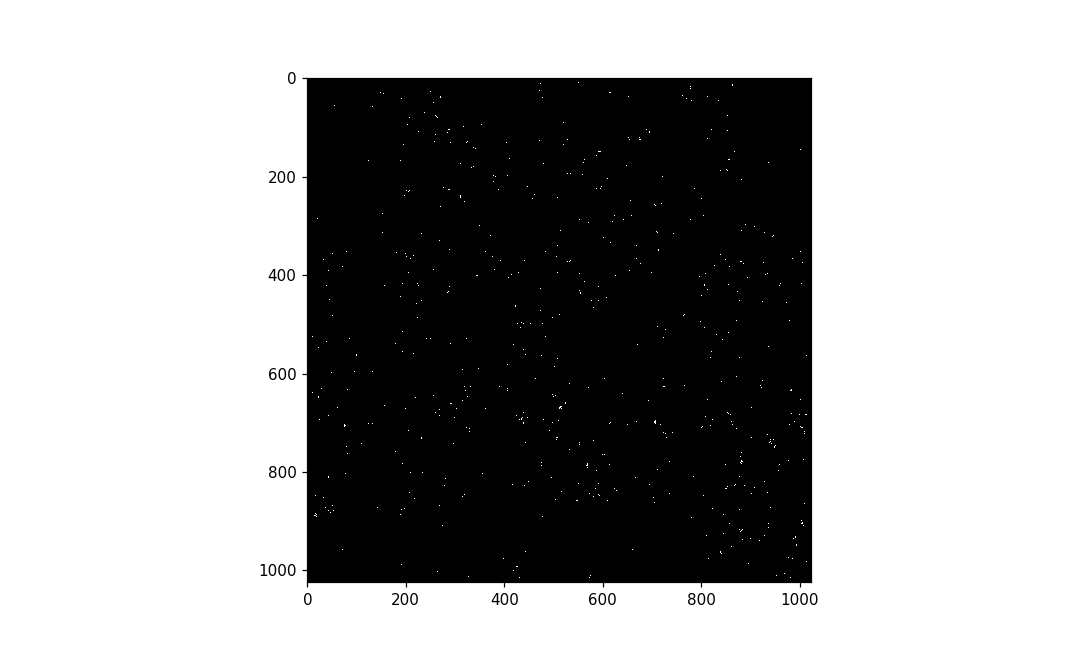

In [105]:
tp1 = pims.open('../data/R04_t001.tif')
background = tp1[1].clip(-2500, 10000)
plt.imshow(background)

Predicted Synapses from PLoS - threshold 0.9

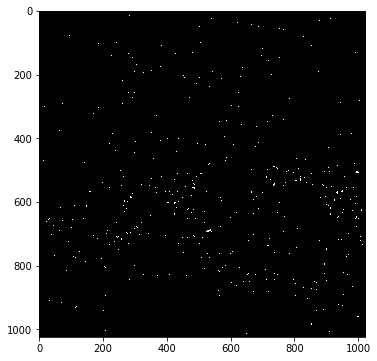

In [70]:
thresh = filters.threshold_otsu(frames[0])
plt.imshow(np.array(frames[0]) > thresh)

In [106]:
thresh = filters.threshold_otsu(frames[1])
plt.imshow(np.array(frames[1]) > thresh)

Detecting "features" in the predicted synapses. Second argument is estimated size of features in pixels

In [107]:
f = tp.locate(frames[1], 15, percentile=0.95)
#detect features

In [108]:
f.head(10) # shows the first few rows of data

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,9.000000,902.000000,1268.958775,1.276448,0.213031,222.853291,1438.0,0.0,1
1,11.412014,474.000000,5985.168646,1.635347,0.032376,645.742492,7195.0,0.0,1
2,13.773110,864.550151,10416.267125,1.820103,0.151722,838.657896,12960.0,0.0,1
3,12.004989,550.499168,2323.772982,3.344487,0.805773,217.321003,2878.0,0.0,1
4,18.000000,65.000000,1274.782237,1.276721,0.212951,223.806221,1444.0,0.0,1
5,17.993241,228.001034,1280.579228,1.280278,0.209056,223.991513,1465.0,0.0,1
6,18.000000,572.000000,1276.370454,1.276544,0.212996,224.123865,1446.0,0.0,1
7,20.241619,265.259895,4852.028880,1.531291,0.286368,569.375733,5788.0,0.0,1
8,20.000000,723.000000,1278.382195,1.276675,0.212955,224.441508,1448.0,0.0,1
9,19.296953,779.285505,7942.698827,2.168273,0.404307,553.864148,10125.0,0.0,1


<IPython.core.display.Javascript object>


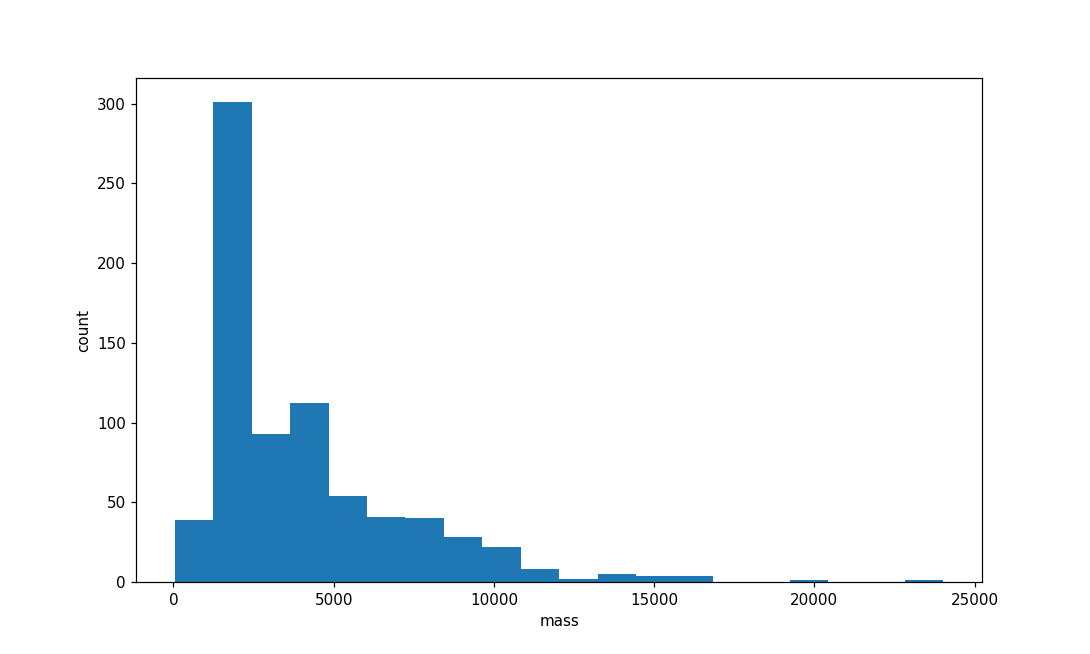

[Text(0,0.5,'count'), Text(0.5,0,'mass')]

In [109]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')

In [110]:
np.median(f['mass'])

2956.8097388475358

In [88]:
f = tp.locate(frames[1], 15, percentile=0.95)
f = tp.locate(frames[1], 15, np.median(f['mass']), percentile=0.95)

<IPython.core.display.Javascript object>


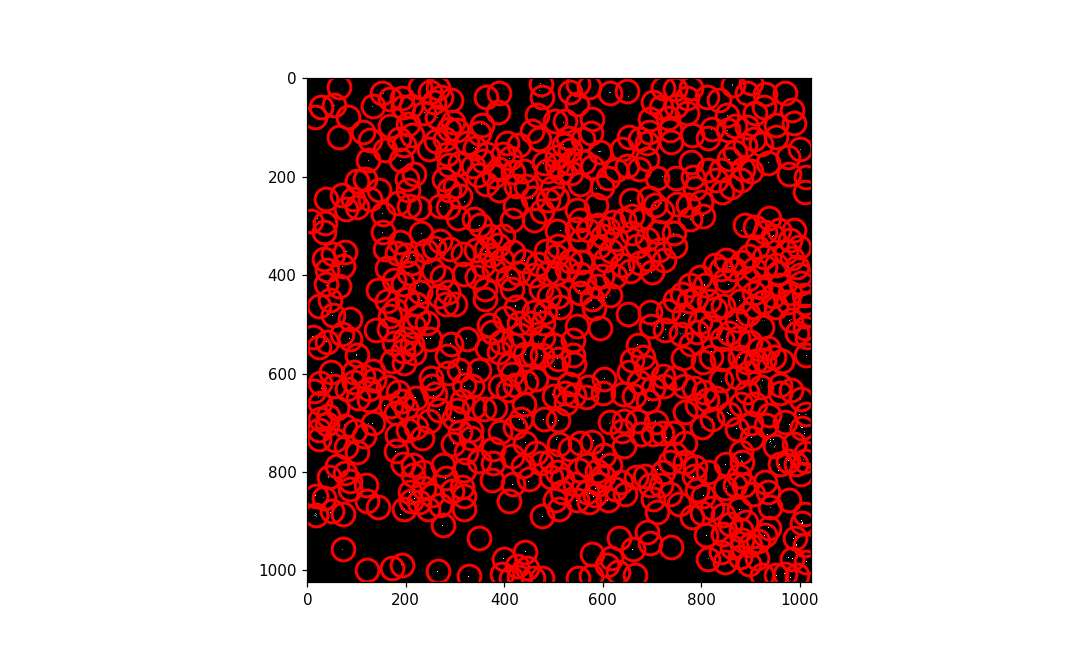

In [111]:
plt.figure()
tp.annotate(f, frames[1])

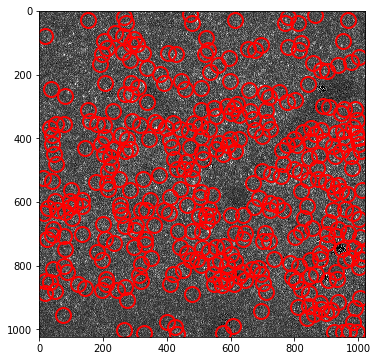

In [90]:
tp.annotate(f, background)

<IPython.core.display.Javascript object>


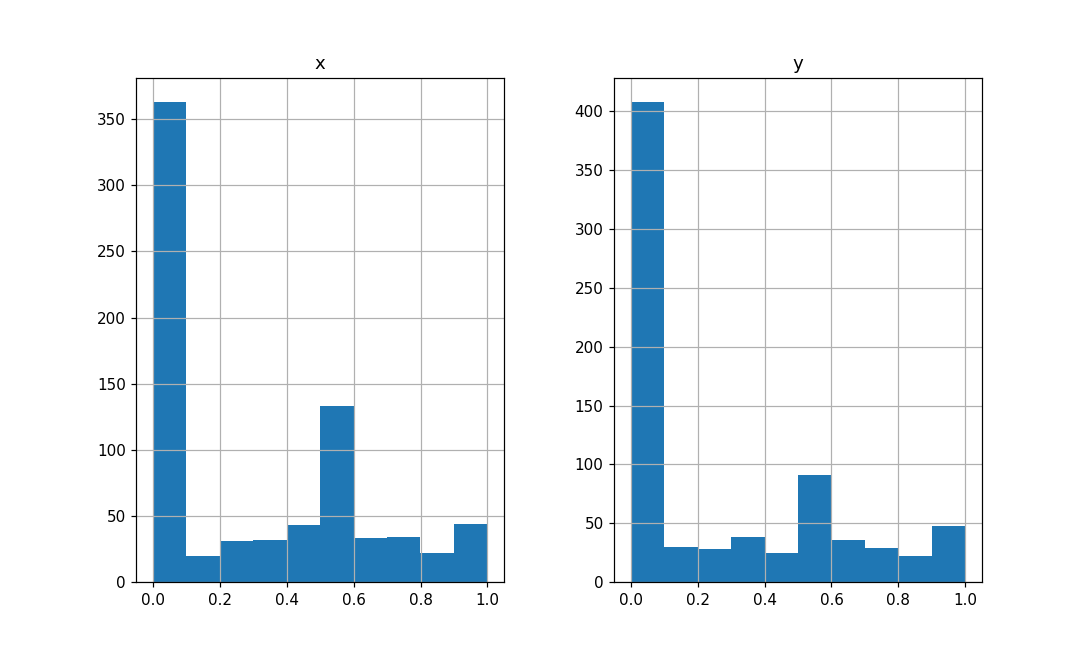

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f982cf05240>,
      dtype=object)

In [112]:
tp.subpx_bias(f)

In [113]:
f = tp.batch(frames, 15, minmass=1000, percentile=0.95)

Frame 3: 781 features


In [114]:
t = tp.link_df(f, 10, memory=2)

Frame 3: 781 trajectories present.


In [115]:
t.head(10)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,8.014915,266.518446,4200.956813,1.462872,0.301526,616.691345,4996.0,0.000041,0,0
561,629.572106,518.185650,8657.478680,1.997748,0.114054,1114.221538,9993.0,0.000021,0,1
562,631.000000,964.500000,5781.501598,1.433310,0.301535,823.685276,6670.0,0.000031,0,2
563,632.000000,10.000000,2941.912381,1.275975,0.213163,516.918165,3336.0,0.000062,0,3
564,632.500000,240.000000,2960.733690,1.432300,0.030907,422.204478,3420.0,0.000060,0,4
565,632.616309,538.899151,7956.435487,3.360831,0.512404,556.382202,11901.0,0.000017,0,5
566,633.906293,618.581003,11826.096773,1.997174,0.253284,1038.491063,15417.0,0.000013,0,6
567,632.501035,691.500318,5475.989241,2.082774,0.405040,505.665855,6670.0,0.000031,0,7
568,635.445950,746.742760,14315.731056,2.430925,0.241905,975.308129,20624.0,0.000010,0,8
569,634.874383,982.950832,2910.907814,1.653611,0.199838,517.403877,3339.0,0.000062,0,9


In [116]:
t1 = tp.filter_stubs(t, 3)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 2090
After: 215


<IPython.core.display.Javascript object>


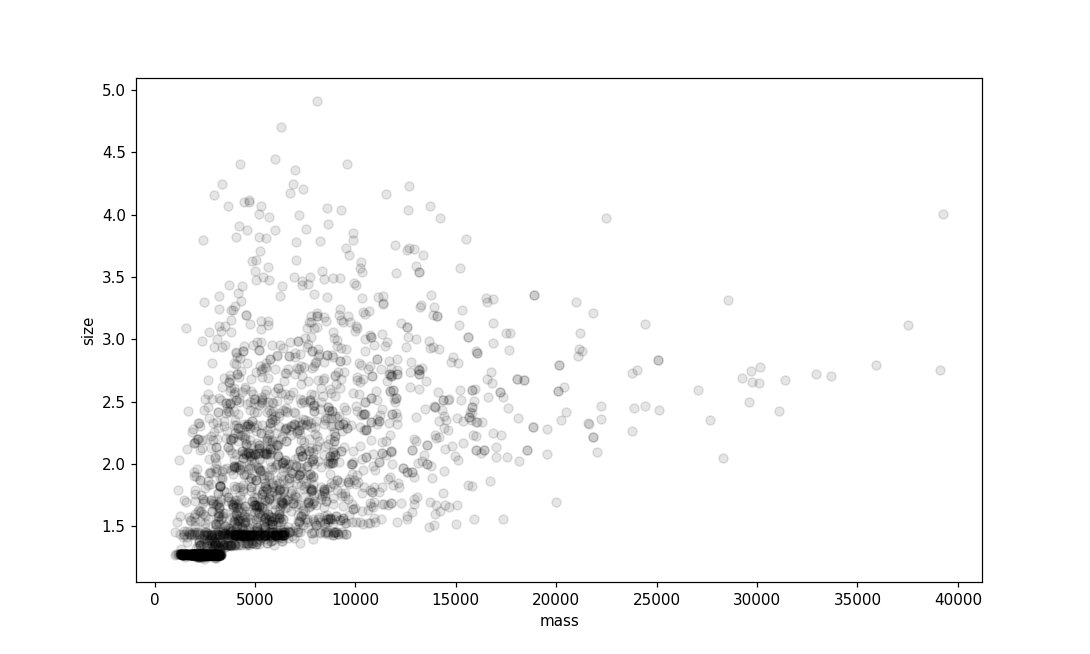

In [117]:
plt.figure()
tp.mass_size(t.groupby('particle').mean())  # convenience function -- just plots size vs. mass

<IPython.core.display.Javascript object>


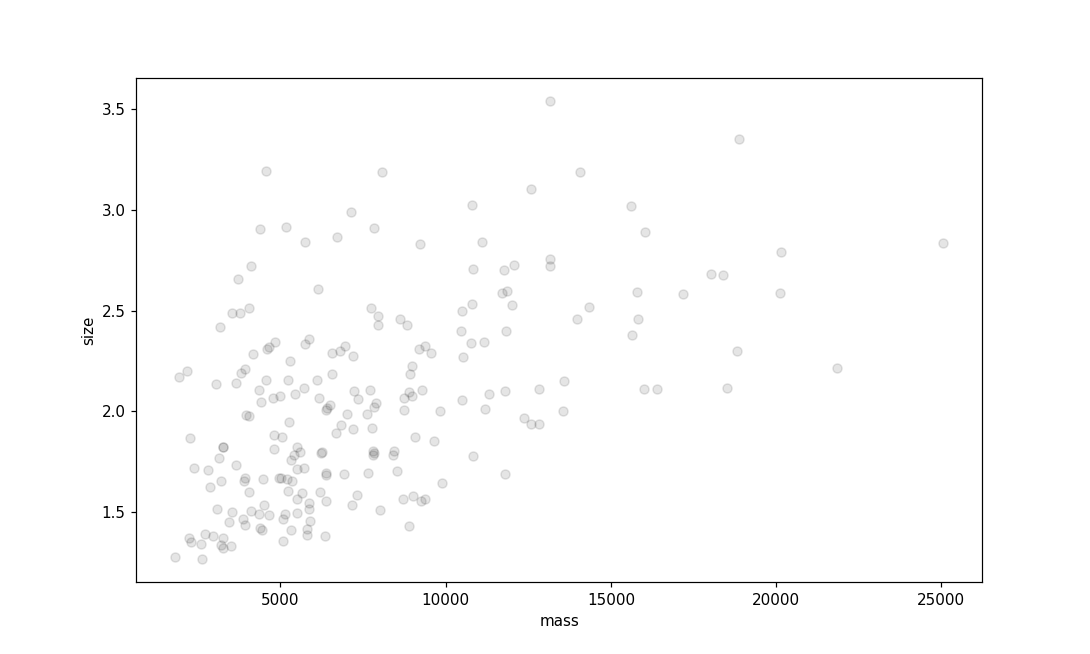

In [120]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean())  # convenience function -- just plots size vs. mass

<IPython.core.display.Javascript object>


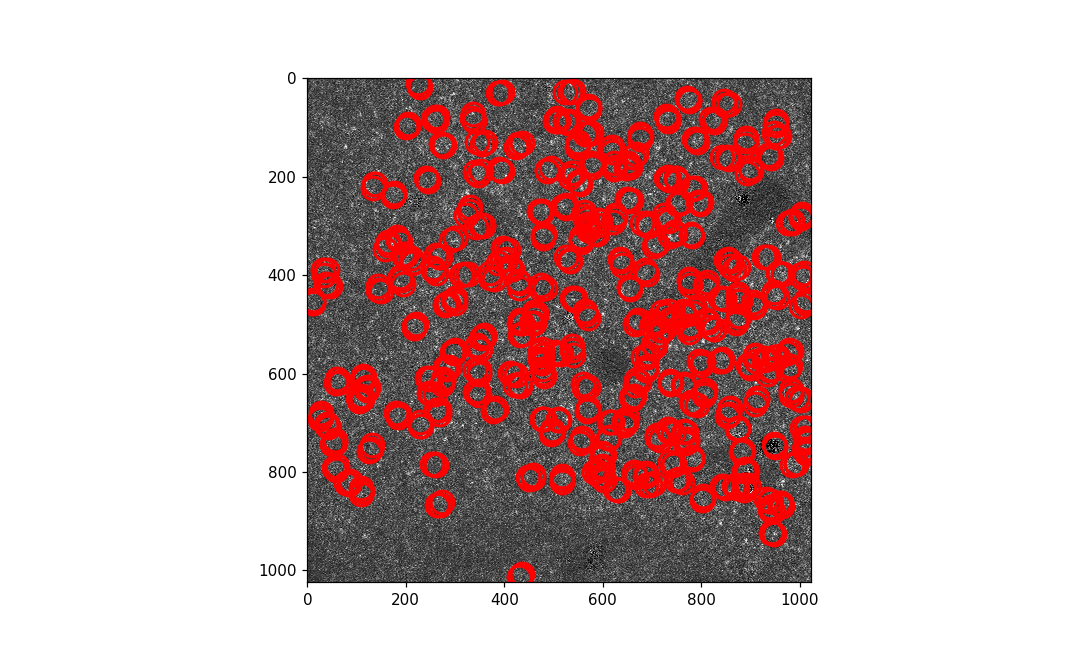

In [121]:
plt.figure()
tp.annotate(t1, background)

<IPython.core.display.Javascript object>


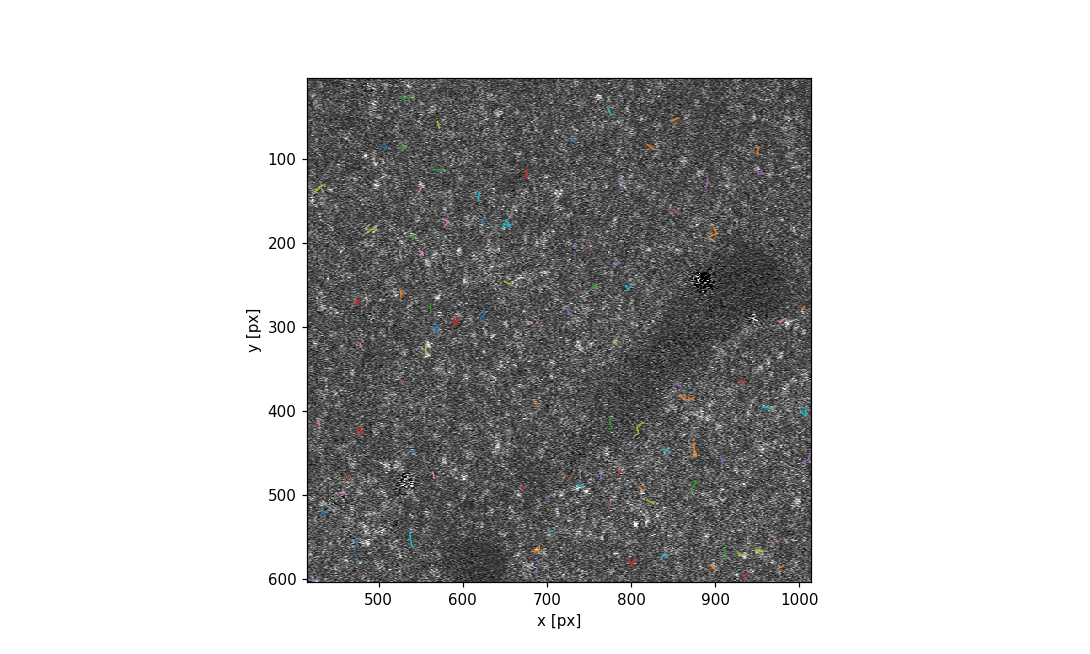

In [122]:
plt.figure()
tp.plot_traj(t1, superimpose=background)

<IPython.core.display.Javascript object>


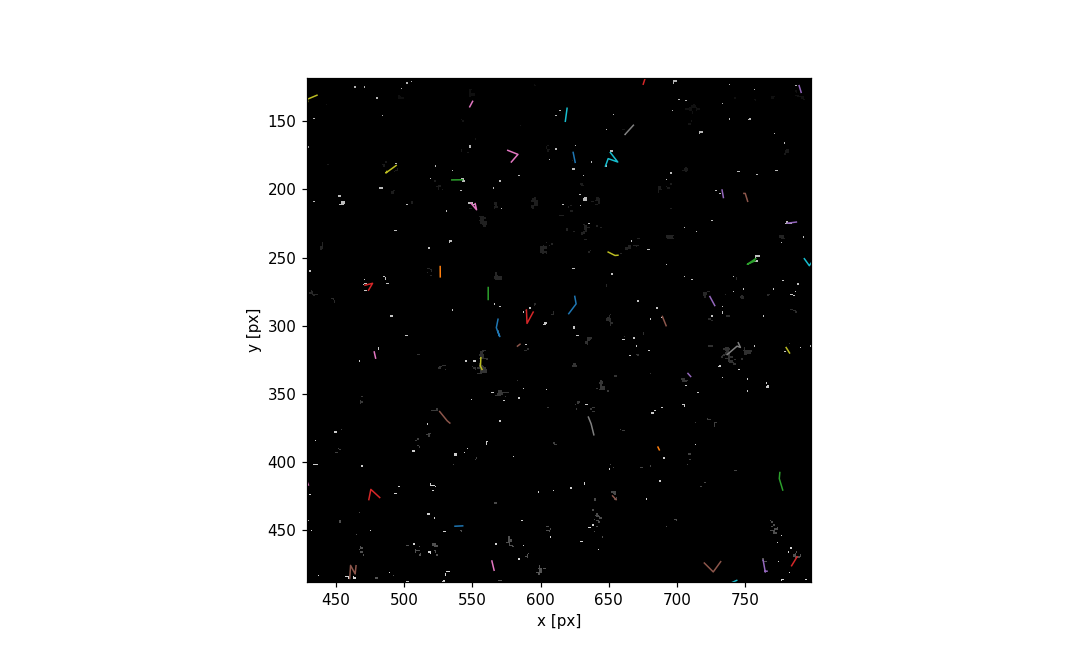

In [123]:
plt.figure()
tp.plot_traj(t1, superimpose=frames[0])

In [124]:
d = tp.compute_drift(t1)

/home/dli/anaconda2/envs/lids/lib/python3.6/site-packages/trackpy/motion.py:289: FutureWarning: 'frame' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  dx = f_diff.loc[mask, pos_columns + ['frame']].groupby('frame').mean()


<IPython.core.display.Javascript object>


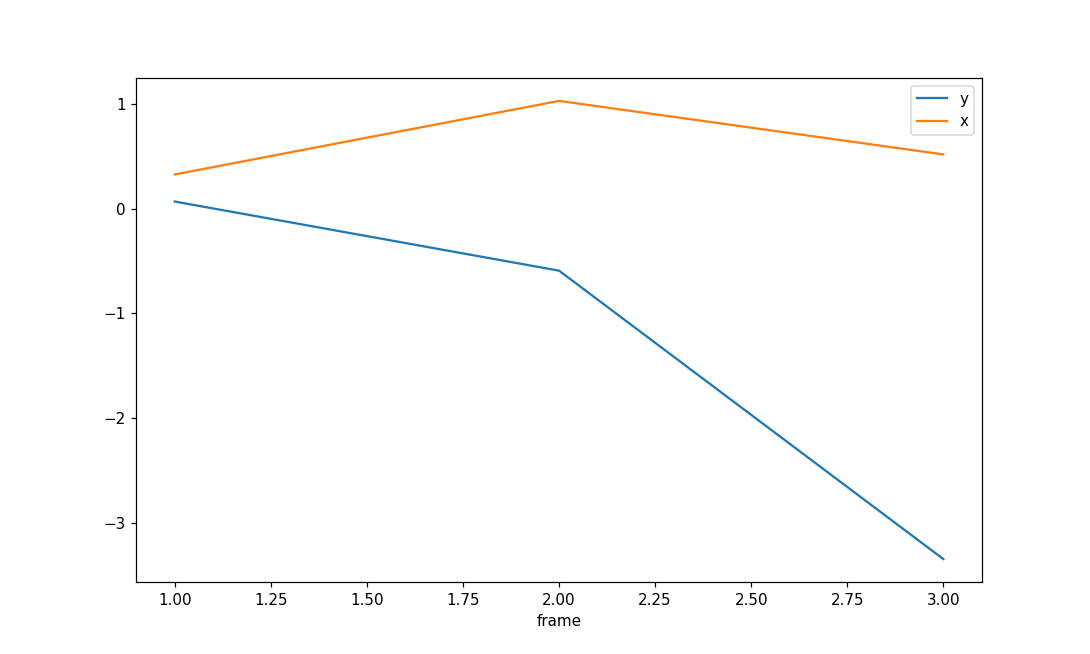

In [125]:
d.plot()

In [126]:
tm = tp.subtract_drift(t1, d)

<IPython.core.display.Javascript object>


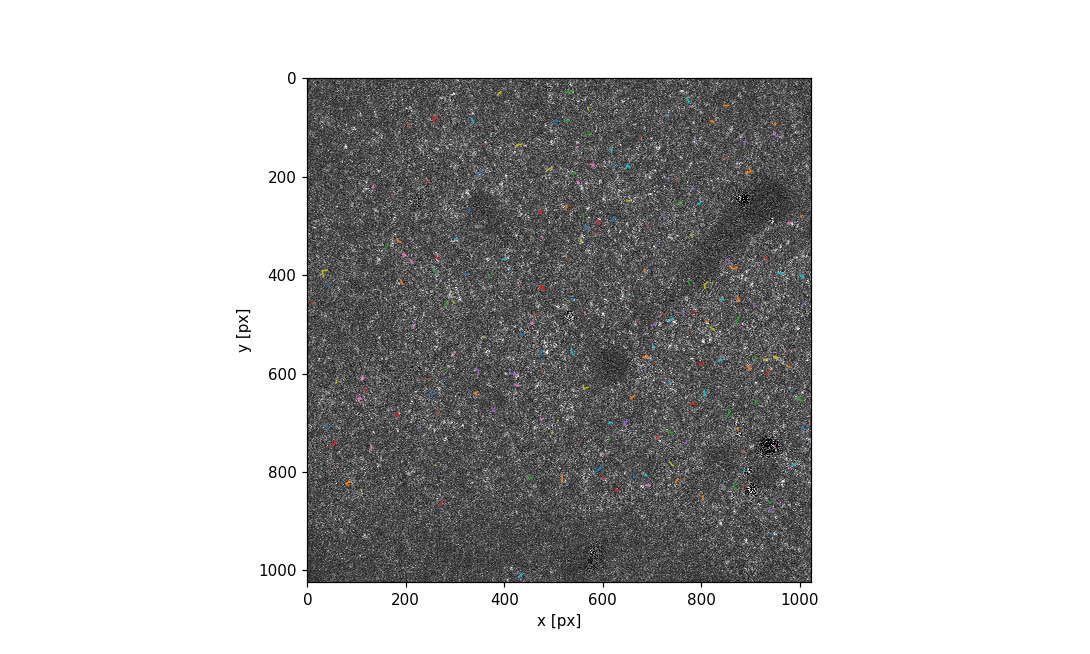

In [128]:
plt.figure()
tp.plot_traj(tm, superimpose=background)

<IPython.core.display.Javascript object>


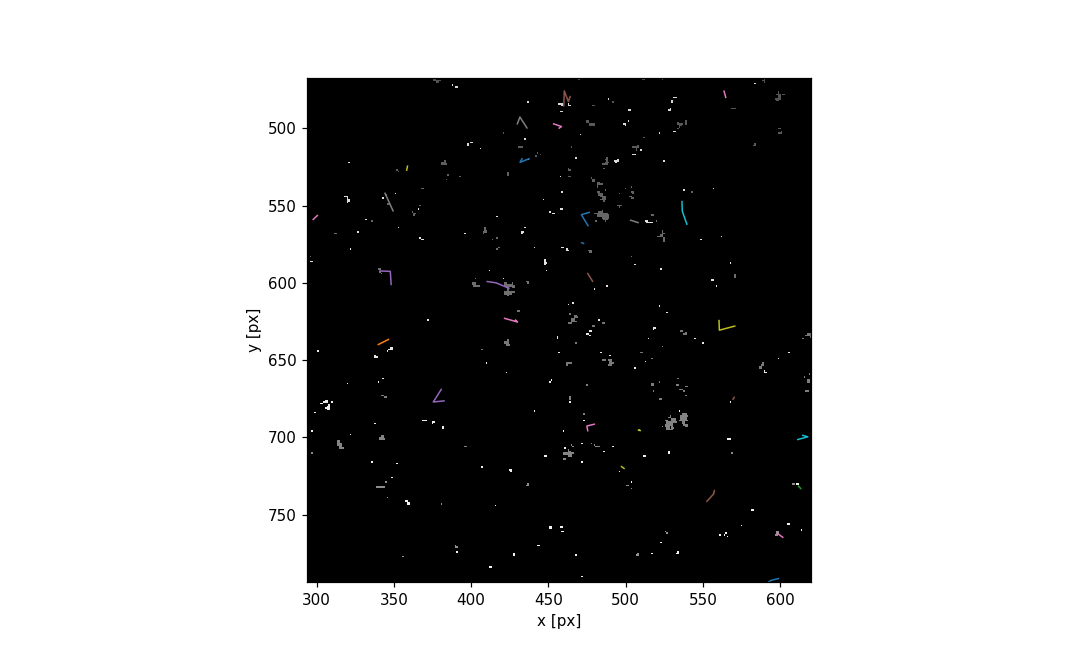

In [129]:
plt.figure()
tp.plot_traj(tm, superimpose=frames[0])

In [133]:
im = tp.imsd(tm, 0.09, 1)  # microns per pixel = 0.09., frames per second = 24

<IPython.core.display.Javascript object>


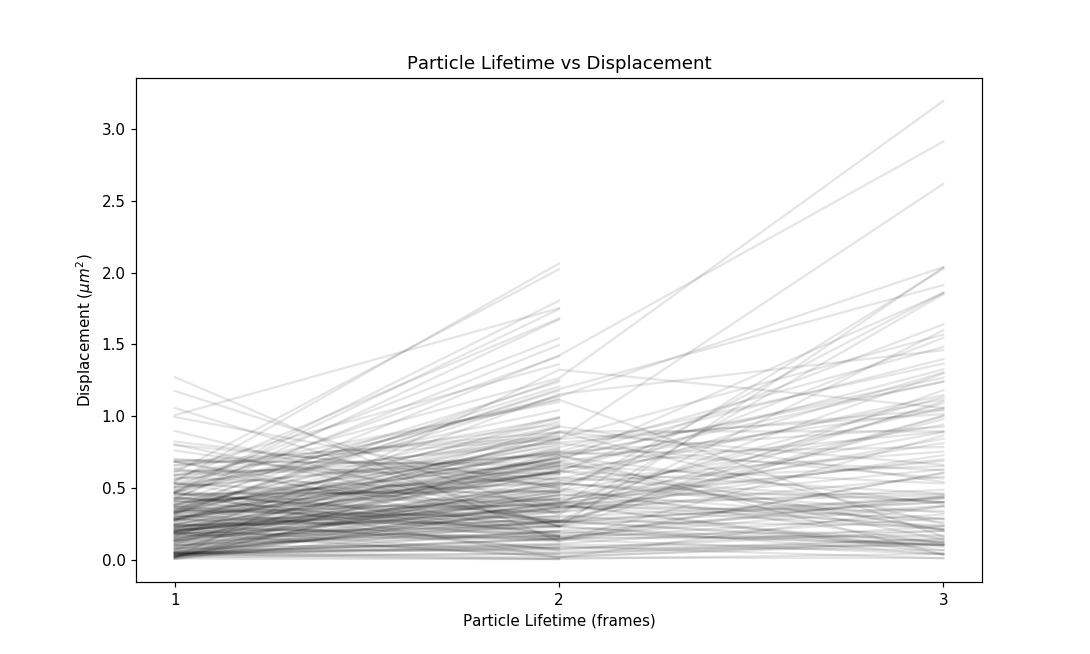

In [147]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(title='Particle Lifetime vs Displacement',
       ylabel=r'Displacement $(\mu m^2)$',
       xlabel='Particle Lifetime (frames)')
ax.set_xticks(np.arange(1, 4, 1.0))
